In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#importing the dataset
df =pd.read_csv("weatherAUS.csv")
df.head()    

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#checking for null values in the dataset
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

#### Replacing the null values with mean and mode, and deleting the date column as it doesnt matter

In [4]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())

In [5]:
df.drop(['Date'],axis=1,inplace=True)
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())


In [6]:
df['WindGustDir']=df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am']=df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm']=df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [7]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

#### Converting categorical columns to numeric using hotEncoder

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



for column in df.columns:
  if df[column].dtype == np.int64 or df[column].dtype == np.float64:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])


In [9]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


Now all our values are not null and numeric

<AxesSubplot:>

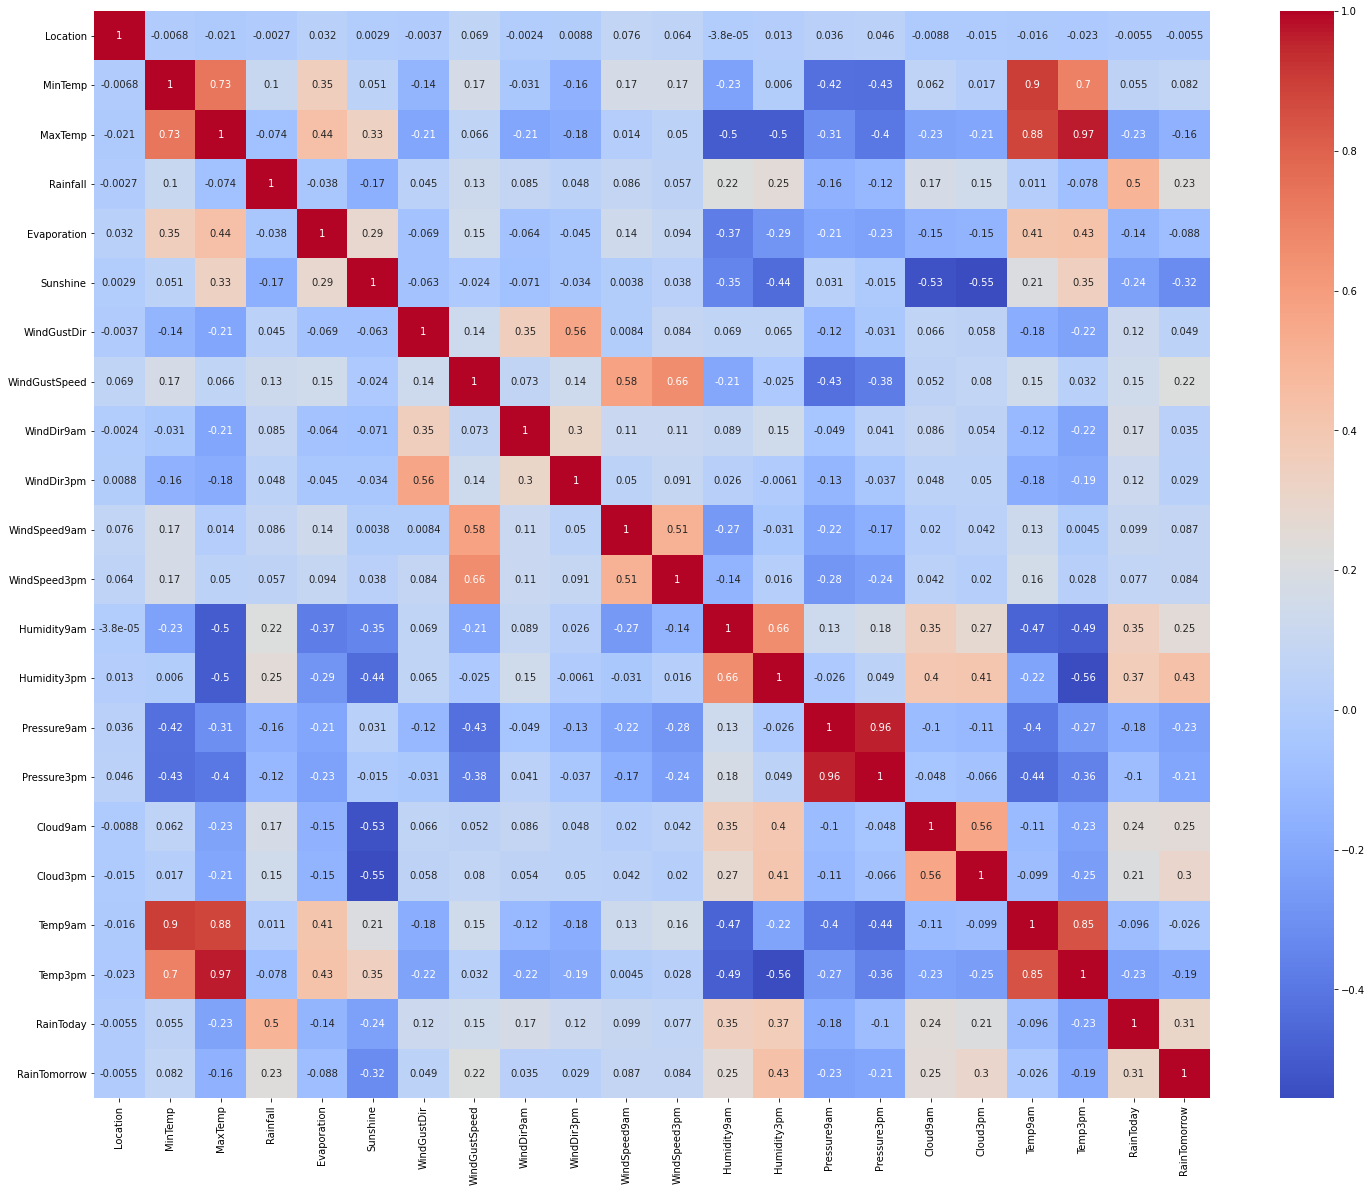

In [10]:
#Now we generate a heatmap
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

Checking for columns with higher correlation ie >0.5

In [11]:
high_corr_data = df.corr()
high_corr_columns = high_corr_data.index[abs(high_corr_data['RainTomorrow'])>=0.5]
high_corr_columns

Index(['RainTomorrow'], dtype='object')

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
#splitting into x and y
x = df.drop(columns = 'RainTomorrow')
y = df['RainTomorrow']

1    31877
0    31877
Name: RainTomorrow, dtype: int64


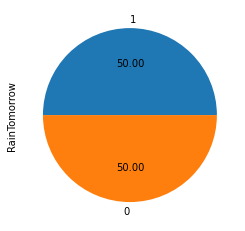

In [14]:
#Now we do oversampling to have equal numbers of both our values
from imblearn.under_sampling import RandomUnderSampler

random_under_sampler = RandomUnderSampler(sampling_strategy = 1)

X_res, y_res = random_under_sampler.fit_resample(x,y)

y_res.value_counts().plot.pie(autopct = "%.2f")

print(y_res.value_counts())

In [15]:
#splitting the residuals into test and train
x_train,x_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=0)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

###  LOGISTIC REGRESSION AND CONFUSION MATRIX

1    31877
0    31877
Name: RainTomorrow, dtype: int64
Logistic regression accuracy: 0.7650


/home/nidhi/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


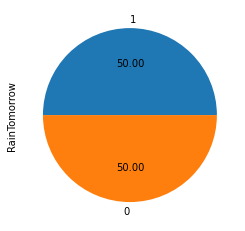

In [19]:
#logistic regression
model_logistic = LogisticRegression()
from imblearn.under_sampling import RandomUnderSampler

random_under_sampler = RandomUnderSampler(sampling_strategy = 1)

X_res, y_res = random_under_sampler.fit_resample(x,y)

y_res.value_counts().plot.pie(autopct = "%.2f")

print(y_res.value_counts())
model_logistic.fit(x_train, y_train)
print('Logistic regression accuracy: {:.4f}'.format(accuracy_score(y_test, model_logistic.predict(x_test))))

Text(0.5, 1.0, 'Confusion Matrix')

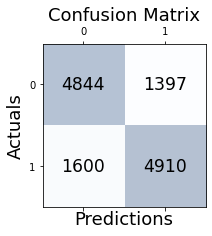

In [20]:
confusionmatrix = confusion_matrix(y_test, model_logistic.predict(x_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

#### RANDOM FOREST CLASSIFIER

In [21]:
model_randomforest = RandomForestClassifier()
model_randomforest.fit(x_train, y_train)
print('Random Forest accuracy: {:.4f}'.format(accuracy_score(y_test, model_randomforest.predict(x_test))))


Random Forest accuracy: 0.7980


Text(0.5, 1.0, 'Confusion Matrix')

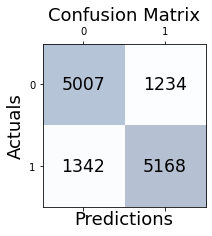

In [22]:
confusionmatrix = confusion_matrix(y_test, model_randomforest.predict(x_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

#### K NEIGHBOURS CLASSIFICATION

In [23]:
model_knnclassfier = KNeighborsClassifier()
model_knnclassfier.fit(x_train, y_train)
print('K Neighbours accuracy: {:.4f}'.format(accuracy_score(y_test, model_knnclassfier.predict(x_test))))



K Neighbours accuracy: 0.7630


Text(0.5, 1.0, 'Confusion Matrix')

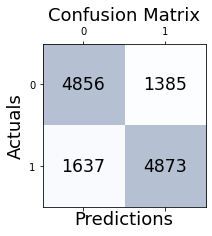

In [24]:
confusionmatrix = confusion_matrix(y_test, model_knnclassfier.predict(x_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

#### XGBOOST CLASSIFIER

In [25]:
model_xgb = XGBClassifier()
model_xgb.fit(x_train, y_train)
print('XGBoostClassifier accuracy: {:.4f}'.format(accuracy_score(y_test, model_xgb.predict(x_test))))



XGBoostClassifier accuracy: 0.7962


Now we apply parameter tuning to Random Forest as it shows the most accuracy so far

In [49]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 5, 9, 11],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 500]
}
#Create a based model

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model_randomforest, param_grid = param_grid, 
                          cv = 3, n_jobs = 4, verbose = 2)


In [50]:
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   22.0s


[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.9s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   3.0s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, total=   4.6s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   2.3s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf

[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   0.9s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   1.8s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, total=   4.9s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=2, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.9s
[CV] bootstrap=True, max_depth=2, max_features=2, min_samples_leaf

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.9min


[CV]  bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=500, total=   6.3s
[CV] bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   3.4s
[CV] bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=500, total=   6.0s
[CV] bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   2.7s
[CV] bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=2, max_features=3, min_samples_l

[CV]  bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300, total=   3.8s
[CV] bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   1.2s
[CV] bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   1.1s
[CV] bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   1.3s
[CV] bootstrap=True, max_depth=2, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=2, max_features=3, min_samples_leaf

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  5.6min


[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   1.6s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   1.5s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   3.6s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   4.9s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_sampl

[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200, total=   3.6s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300, total=   5.1s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   1.7s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100, total=   1.5s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_le

[CV] bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   6.4s
[CV] bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   2.5s
[CV] bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   2.0s
[CV] bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100, total=   2.0s
[CV] bootstrap=True, max_depth=5, max_features=3, min_sample

[CV]  bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   6.4s
[CV] bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=500, total=  10.7s
[CV] bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300 
[CV]  bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300, total=   6.5s
[CV] bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=5, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=500, total=  11.5s
[CV] bootstrap=True, max_depth=9, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=2, min_sample

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed: 14.8min


[CV]  bootstrap=True, max_depth=9, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  13.1s
[CV] bootstrap=True, max_depth=9, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=9, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300, total=   7.7s
[CV] bootstrap=True, max_depth=9, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=9, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=500, total=  13.1s
[CV] bootstrap=True, max_depth=9, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200, total=   5.3s
[CV] bootstrap=True, max_depth=9, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=9, max_features=2, min_sample

[CV] bootstrap=True, max_depth=9, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500 
[CV]  bootstrap=True, max_depth=9, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=500, total=  13.1s
[CV] bootstrap=True, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   7.0s
[CV] bootstrap=True, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=500, total=  18.2s
[CV] bootstrap=True, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=9, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   6.9s
[CV] bootstrap=True, max_depth=9, max_features=3, min_samples_le

[CV] bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   9.3s
[CV] bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500, total=  15.6s
[CV] bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   6.2s
[CV] bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500 
[CV]  bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=500, total=  15.6s
[CV] bootstrap=True, max_depth=11, max_features=2, min_s

[CV]  bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   6.2s
[CV] bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=500, total=  15.4s
[CV] bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   6.2s
[CV] bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300 
[CV]  bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300, total=   9.3s
[CV] bootstrap=True, max_depth=11, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=11, max_features=2, min

[Parallel(n_jobs=4)]: Done 864 out of 864 | elapsed: 24.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True], 'max_depth': [2, 5, 9, 11],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=2)

In [52]:
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': 11, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}


In [53]:
newmodel_randomforest = RandomForestClassifier(bootstrap= True, max_depth= 11, max_features= 3, min_samples_leaf=3, min_samples_split= 8, n_estimators = 300)
newmodel_randomforest.fit(x_train, y_train)
print('Random Forest accuracy: {:.4f}'.format(accuracy_score(y_test, model_randomforest.predict(x_test))))


Random Forest accuracy: 0.7980
